# **Introduction**

In this first part Jupyter Notebook, we will explore different **supervised machine learning models**(specifically classification) with [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). Specifically, we will explore
- K-Nearest Neighbor
- Logistic Regression

In the second part of this Jupyter Notebook, we will explore **Reinforcement Learning**.

**Learning Objectives**
- Visualization with Python libraries
- Difference Machine Learning Models with Python Libraries
- Illustrate the difference of ML model performance and the importance of testing various models and understanding the dataset before starting any machine learning project!

To begin, simply make a copy of this Jupyter Notebook and follow our video! :)

Cheers,

Zad  & Kevin

### **Some notes before we dive into the ML codes**

#### **On ML development process**


1. Data Collection & Analysis
2. Train-test split 
3. Identify correct problem and ML model
4. Evaluating the performance of the algorithm 
5. Try different model and retrain/ retest.

# **Part 1: Supervised ML models**
<img src="img/iris.png" width=700 height=300/>

In [1]:
## Import Necessary libraries

## Preprocessing libraries
import pandas as pd
import numpy as np

## Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset library
from sklearn.datasets import load_iris

## Train-test sklearn library
from sklearn.model_selection import train_test_split

## Machine Learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## Evaluation metrics library
from sklearn import metrics

In [2]:
## Import Dataset
# iris is of sklearn.utils.Bunch type. iris['DESCR'] describes the data

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
## exploring the shape of the data (shape[0] is the rows; shape[1] is the)
print("The shape of the dataframe is", df.shape)


The shape of the dataframe is (150, 5)


# **1. Data Analaysis**

In this section, we will use various visualization tools to explore the dataset. 

It is important to do initial data exploration as
- Data might be biased (biased data will affect the accuracy of the model)
- Data might be noisy (especially high dimension data)
- It shows us the relationship between different features and target and we can better train our ML model

*Note*: The Iris dataset's label was relatively balance; However, not every dataset has balance dataset, which always led to **Failure of Classification Accuracy for Imbalanced Class Distributions** For more information about imbalanced class and its effect on accuracy, refer the following blog post:
https://machinelearningmastery.com/failure-of-accuracy-for-imbalanced-class-distributions/ 

Therefore it is always important to *check the count of your label and do necessarily preprocessing* before you start running a model on your dataset.

Python libraries for Data Analysis:     

* Pandas (https://pandas.pydata.org/)
* Matplotlib (https://matplotlib.org/)
* Seaborn (https://seaborn.pydata.org/)
* Plotly (https://plotly.com/graphing-libraries/)

([<matplotlib.patches.Wedge at 0x7fa4599db580>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.3%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.3%')])

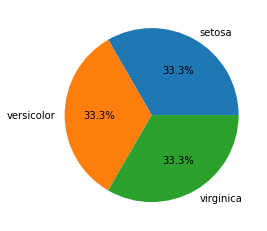

In [5]:
## Piechart to understand the count of the dataset
#labels='setosa','versicolor','virginica'
#g1=df['target'].value_counts()
plt.pie(df.target.value_counts(),labels=iris.target_names, autopct='%1.1f%%', shadow=False)

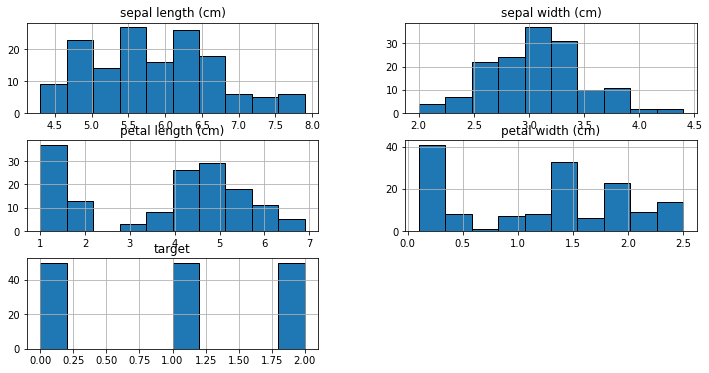

In [6]:
## Plotting histogram over all features to check distributions
df.hist(edgecolor = 'black')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<AxesSubplot:xlabel='target', ylabel='sepal width (cm)'>

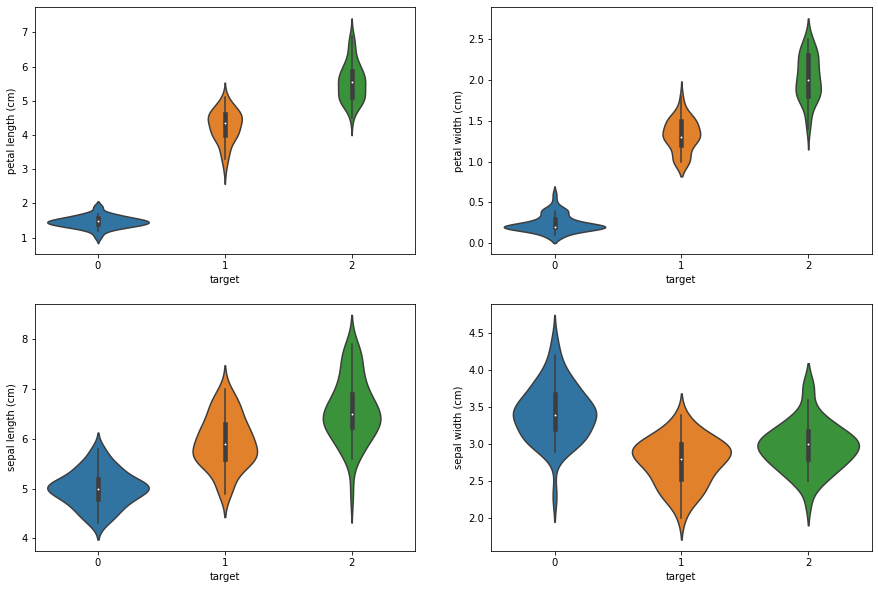

In [7]:
## Plot how the length and width vary according to the species
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x=df['target'],y=df['petal length (cm)'],data=df)
plt.subplot(2,2,2)
sns.violinplot(x=df['target'],y=df['petal width (cm)'],data=df)
plt.subplot(2,2,3)
sns.violinplot(x=df['target'],y=df['sepal length (cm)'],data=df)
plt.subplot(2,2,4)
sns.violinplot(x=df['target'],y=df['sepal width (cm)'],data=df)

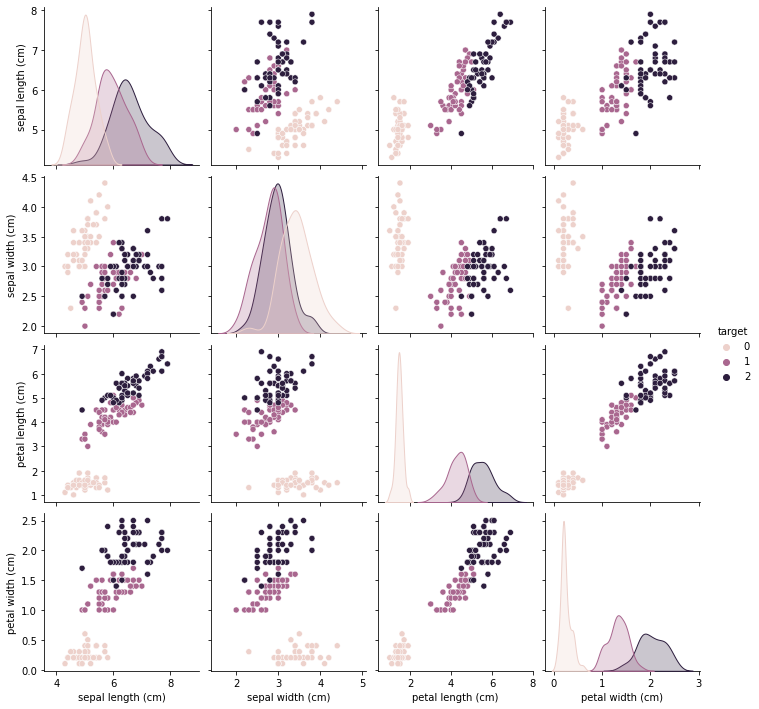

In [8]:
sns.pairplot(df, hue='target')

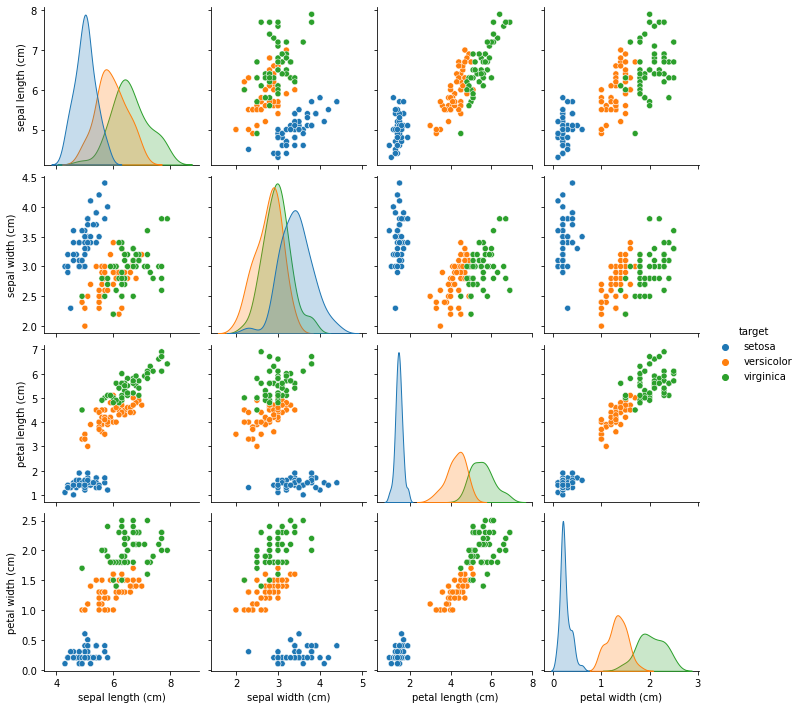

In [10]:
# use targetname instead (results in prettier colours)
df2 = pd.DataFrame(iris.data, columns = iris.feature_names)
df2['target'] = [iris.target_names[t] for t in iris.target]
sns.pairplot(df2, hue='target')

<AxesSubplot:>

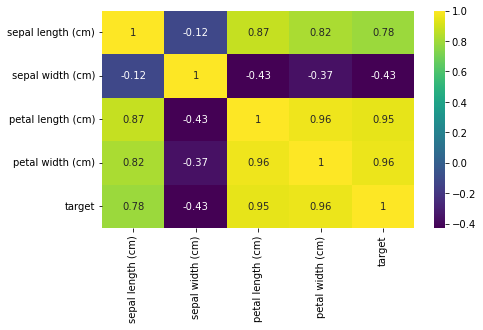

In [11]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),annot=True, cmap = 'viridis')
## For more information about the cmap colors in seaborn (ie: sns), refer documentation: https://seaborn.pydata.org/tutorial/color_palettes.html 



# **2. Train-test split**

It is important to split the data into two groups, training data and testing data, where: 

*   Training data always have larger number than testing data (70-30 / 80-20 split)
* Never train on test data

Make sure that your test set meets the following two conditions:

- Is large enough to yield statistically meaningful results.
- Is representative of the data set as a whole. In other words, don't pick a test set with different characteristics than the training set.

More information about train-test split: https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data 






In [12]:
train, test = train_test_split(df, test_size = 0.3)

print("The training data has a shape of", train.shape)
print("The testing data has a shape of", test.shape)

The training data has a shape of (105, 5)
The testing data has a shape of (45, 5)


In [13]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
63,6.1,2.9,4.7,1.4,1
75,6.6,3.0,4.4,1.4,1
149,5.9,3.0,5.1,1.8,2
122,7.7,2.8,6.7,2.0,2
73,6.1,2.8,4.7,1.2,1


In [14]:
## Cleaning the data up to prep for training and testing (ie: dropping labels columns)
## For X - takes only the features
train_X = train[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
train_y = train['target']
test_X = test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
test_y = test['target']

In [15]:
## printing it out to show example:
train_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
63,6.1,2.9,4.7,1.4
75,6.6,3.0,4.4,1.4
149,5.9,3.0,5.1,1.8
122,7.7,2.8,6.7,2.0
73,6.1,2.8,4.7,1.2


In [16]:
train_y.head()

63     1
75     1
149    2
122    2
73     1
Name: target, dtype: int64


#**3. Identify correct problem and ML model**

Regression vs Classification

*   **Regression** : Regression prediction problems are usually quantities or sizes (ie: *continuous output*). For example, when provided with a dataset about houses, and you are asked to predict their prices, that is a regression task because price will be a continuous output.

*   **Classification**: If provided with a single or several input variables, a classification model will attempt to predict the value of a single or several conclusions (ie: d*iscrete output*).  For example, when provided with a dataset about houses, a classification algorithm can try to predict whether the prices for the houses “sell more or less than the recommended retail price.”

Identifying the right type of problems (ie: a regression or classification problem) is important in helping us to choose the correct ML model.

For example, in this problem, we are trying to classify based on the petal length & width, sepal length & width to classify into different type of iris,so we should use a classification ML models, such as KNN, Logisitic Regression and SVM.

# **4. Evaluation Metrics**

1. **Understanding True/False Positive/Negative**

A *true positive* is an outcome where the model correctly predicts the positive class. Similarly, a *true negative* is an outcome where the model correctly predicts the negative class.

A *false positive* is an outcome where the model incorrectly predicts the positive class. And a *false negative* is an outcome where the model incorrectly predicts the negative class.

2. **Accuracy**

Informally, accuracy is the fraction of predictions our model got right. Formally, it is defined as (TP + TN)/ (TP + TN + FP + FN), where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative 

3. **Recall**

Informally, recall is defined as "What proportion of actual positives was identified correctly?". Mathematically, it is defined as TP/ (TP + FN).

4. **Precision**

Informally, precision is defined as "What proportion of positive identifications was actually correct?". Mathematically, it is defined as TP/ (TP + FP).


5. **Other evaluation metics: ROC curve and AUC**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: *True Positive Rate*, which is synonym to recall, and *False Positive Rate*. 

Sometimes, computing ROC curve might be inefficient. Therefore, alternatively, we will consider using **AUC (Area Under the Curve)**. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

Recommend reading more about ROC curve and AUC curve below

***It is important to evaluate your ML model with different evaluation metrics to make sure your model is robust and unbiased.***

If it is confusing, more resources to understand evaluation metrics for ML models: 
- [True/False Positive/Negative](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative)
- [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy)
- [Precision and Recall ](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
- [ROC and AUC curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
- Professor Finale Doshi Valez's TED talk on importance on ML interpretability and robustness (https://youtu.be/4lIr8rgo5zE)



# **3.1 What is K-Nearest Neighbors?**

## A Brief Introdcution

The “K” is KNN algorithm is the nearest neighbor we wish to take the vote from. A simple intuitive explanation will be below

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1920px-KnnClassification.svg.png" width="200"/>
</div>

The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

## Choosing a k-value

Choice of k is very critical – A small value of k means that noise will have a higher influence on the result. A large value make it computationally expensive and kinda defeats the basic philosophy behind KNN (that points that are near might have similar densities or classes ). Some method in choosing a good k-value include plotting a graph of accuracy vs k-values, or a graph of error rate vs k-values, or trying with first sqrt(n), where n = number of data points.

## Different distance metrics

KNN is a ML model that heavily rely on distance metrics. The default distance metrics is *minkowski*, but you can also used *Euclidean* distance and other distance metrics, depending on your data.

## KNN resources:     
- KNN clearly explained by StarQuest: https://www.youtube.com/watch?v=HVXime0nQeI 
- SKlearn KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Source: Wikipedia

In [ ]:
## Fitting it into KNN model
model= KNeighborsClassifier(n_neighbors=10)
model.fit(train_X,train_y)

## Determining the result of the fiting
prediction=model.predict(test_X)

#### What if?

- What if you try with different k-value? 
- What if you try with different distance metrics?

In [ ]:
## Evaluating KNN:

print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))
print('The precision of the KNN is',metrics.precision_score(prediction,test_y, average="weighted"))
print('The recall of the KNN is',metrics.recall_score(prediction,test_y, average="weighted"))


### **Question**

1. What does the accuracy score means here?
2. What does the precision score means here?
3. What does the recall score means here?

*Answer*
1. That means that out of all the prediction that the ML model made, 95% of the prediction is correct.
2. That means that out of all the total predicted positive observations,95% of the predicted positive observations is correct.
3. That means that out of all the correct label, 95% are actually correct.

# **3.2 Logistic regression**

Logistic regression depends on logistic function (also known as sigmoid function).  It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.
Logistic regression is estimated using **Maximum Likelihood Estimation (MLE) approach.**

<img src="https://ai-master.gitbooks.io/logistic-regression/content/assets/sigmoid_function.png" width="400" style="center"/>

Types of logistic regression:
- *Binary Logistic Regression:* The target variable has only 
two possible outcomes such as Spam or Not Spam.
- *Multinomial Logistic Regression:* The target variable has three 
or more nominal categories such as predicting the type of Wine.
- *Ordinal Logistic Regression:* the target variable has three or more 
ordinal categories such as restaurant or product rating from 1 to 5.

More on logistic regression:
- [Understanding Logistic Regression in Python ](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)
- [Sklearn logistic Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Star Quest: Logistic Regression](https://youtu.be/yIYKR4sgzI8)

In [ ]:
model2 = LogisticRegression()
model2.fit(train_X,train_y)
prediction_lr=model2.predict(test_X)


In [ ]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_lr,test_y))
print('The precision of the Logistic Regression is',metrics.precision_score(prediction_lr,test_y, average="weighted"))
print('The recall of the Logistic Regression is',metrics.recall_score(prediction_lr,test_y, average="weighted"))

# **5. Alternatives and Improvements**

- For K-Means, you can plot a graph of accuracy vs k-values, or a graph of error rate vs k-values to find better k-value
- Test with different ML model, such as [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree#:~:text=A%20decision%20tree%20is%20a%20flowchart%2Dlike%20structure%20in%20which,taken%20after%20computing%20all%20attributes) //  [Support Vector Machine(SVM)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)) // [Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network)




# **Part 2: Reinforcement Learning**





In [ ]:
import random

reward = [None, None, None, 3, 9, 1, 20]

def start_game():
    state = {"moves": (1,2), "hallway": 1}
    return state

def play(move, state):
    if state["hallway"] == 1:
        state["hallway"] = 2
        if move == 1:
            state["moves"] = (3,4)
        else:
            state["moves"] = (5,6)
        return None

    probability = reward[move]
    return random.randint(0, probability)


def learn():

    heuristic = {}

    learning_rate = 0.01

    for i in range(10000):
        game = start_game()

        if game["moves"] not in heuristic.keys():
            tmp = {"heuristic" : 0, "prob" : [0, 0]}
            heuristic[game["moves"]] = tmp

        first_state = game["moves"]

        if random.random() < 0.5 + (heuristic[game["moves"]]["prob"][0] - heuristic[game["moves"]]["prob"][1]) / (heuristic[game["moves"]]["prob"][0] + heuristic[game["moves"]]["prob"][1] + 1):
            play(game["moves"][0], game)
            if game["moves"] in heuristic:
               heuristic[first_state]["prob"][0] += learning_rate * heuristic[game["moves"]]["heuristic"]
        else:
            play(game["moves"][1], game)
            if game["moves"] in heuristic:
               heuristic[first_state]["prob"][1] += learning_rate * heuristic[game["moves"]]["heuristic"]

        if game["moves"] in heuristic:
                heuristic[first_state]["heuristic"] += heuristic[game["moves"]]["heuristic"]

        if game["moves"] not in heuristic.keys():
            tmp = {"heuristic" : 0, "prob" : [0, 0]}
            heuristic[game["moves"]] = tmp

        second_state = game["moves"]

        if random.random() < 0.5 + (heuristic[game["moves"]]["prob"][0] - heuristic[game["moves"]]["prob"][1]) / (heuristic[game["moves"]]["prob"][0] + heuristic[game["moves"]]["prob"][1] + 1):
            reward = play(game["moves"][0], game)
            heuristic[second_state]["prob"][0] += learning_rate * reward
        else:
            reward = play(game["moves"][1], game)
            heuristic[second_state]["prob"][1] += learning_rate * reward

        heuristic[second_state]["heuristic"] += learning_rate * reward

    return heuristic

def expected_learned():

    heuristic = learn()
    avg = 0

    for i in range(1000):

        game = start_game()

        if random.random() < 0.5 + (heuristic[game["moves"]]["prob"][0] - heuristic[game["moves"]]["prob"][1]) / (heuristic[game["moves"]]["prob"][0] + heuristic[game["moves"]]["prob"][1] + 1):
            play(game["moves"][0], game)
        else:
            play(game["moves"][1], game)

        if random.random() < 0.5 + (heuristic[game["moves"]]["prob"][0] - heuristic[game["moves"]]["prob"][1]) / (heuristic[game["moves"]]["prob"][0] + heuristic[game["moves"]]["prob"][1] + 1):
            avg += play(game["moves"][0], game)
        else:
            avg += play(game["moves"][1], game)
    return(avg / 1000)

def expected_unlearned():
    avg = 0

    for i in range(1000):

        game = start_game()

        if random.random() < 0.5:
            play(game["moves"][0], game)
        else:
            play(game["moves"][1], game)

        if random.random() < 0.5:
            avg += play(game["moves"][0], game)
        else:
            avg += play(game["moves"][1], game)
    return(avg / 1000)

print("Expected Value Before Learning: " + str(expected_unlearned()))
print("Expected Value After Learning: " + str(expected_learned()))